In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
#Read CSV File

lin = pd.read_csv('http://bit.ly/w-data')

lin.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Some EDA Part

In [4]:
#Find Duplicate Value

lin.duplicated().sum()

0

In [5]:
#Find Nan Value

lin.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
lin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [7]:
lin.shape

(25, 2)

In [8]:
lin.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualize Data Set

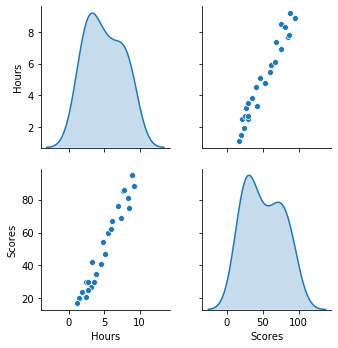

In [9]:
sns.pairplot(lin, diag_kind='kde')

# Traing and Testing

In [10]:
x=np.array(lin['Hours']).reshape(-1,1)
y=np.array(lin['Scores']).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

x_train.shape

(22, 1)

# Build a model

In [11]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = reg.predict(x_test)
y_pred

array([[93.96131165],
       [11.48993104],
       [15.56259181]])

# Check Model Accuracy 

In [13]:
# print the coefficients
print(reg.intercept_)
print(reg.coef_)

[0.29011392]
[[10.18165193]]


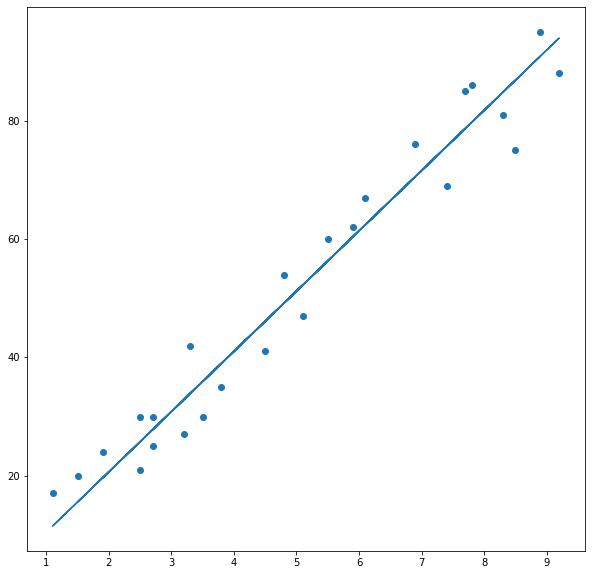

In [16]:
line = reg.coef_*x+reg.intercept_

#Plot for test data
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

In [17]:
#Student Score 9.25 hours

int(reg.predict([[9.25]]))

94